### Multiplicative noise

Multiplicative noise is a kind of noise (random fluctuation) that is dependent of the state of the system. It is sometimes also known as parametric or state dependent noise. 
Such noise is ubiquitous in many fields of complexity science from neuroscience, to climate science to finance. Multiplicative noise can have profound effects on the state of
the system, and may even induce bifurcations. As we will see here multiplicative noise may in contrast to additive noise in some sense also stabilize systems.

A one dimensional noisy system may be described by a stochastic differential equation (SDE)
$$\dot{x} = f(x) + \sqrt{2D}g(x)\xi(t)$$
where $f(x)$ is the drift term, $g(x)$ is the diffusion term and $\xi(t)$ is the noise typically assumed to be Gaussian white noise. If $g(x) \neq$ const. then the noise is said to be multiplicative.




![Stochastics take lives!](stock_crash.png "Stock Crash")

In [3]:
from base_m_noise import *
import base_m_noise; importlib.reload(base_m_noise)

<module 'base_m_noise' from '/Users/tphillips/multiplicative_noise/python/base_m_noise.py'>

### Typical diffusion process with additive noise

A well known one dimensional SDE with additive noise is the Ornstein-Uhlenbeck (OU) process 
$$\dot{x} = \frac{\mu - x}{\tau} + \sqrt{\frac{2}{\tau}}\xi(t)$$
We can see looking at the probablity distribution that the noise causes the distribution to diffuse (broaden) over time. This is in fact quite a general effect of additive noise.

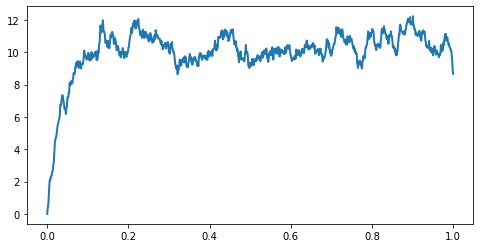

In [6]:
sigma = 1.  
mu = 10. 
tau = .05 

dt = .001  
T = 1.  
n = int(T / dt) 
t = np.linspace(0., T, n)  

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

x = np.zeros(n)

for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

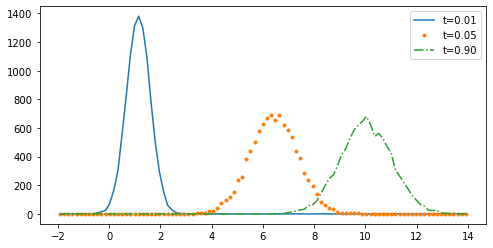

In [7]:
ntrials = 10000
X = np.zeros(ntrials)

bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for i in range(n):
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)

    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
                
ax.legend()

plt.show()

In the followint we will consider a simple equation with multiplicative noise: $\dot{x} = a + \sqrt{2D}x \xi(t)$

It is visible from the plots below that multiplicative noise acts to skew the probability distribution while also leaving it with a heavier tail. 
Such effects are often not visible when using the mean average. The following plot demonstrates that the mean in some case also needs to be averaged over many ensembles $N$.
The maximum does not.

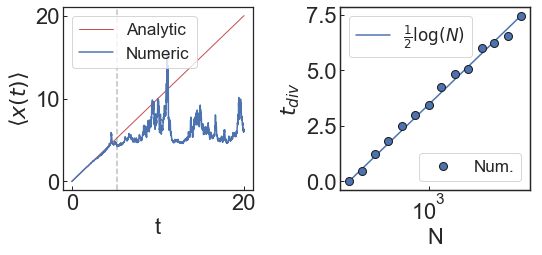

In [ ]:
om = 1

x0 = 100000
trials = np.arange(x0, 10*x0, x0)

trials = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 
          30000, 100000] # 300000, 1000000, 3000000
div_po = []

for tr in trials:
    tlist, ml2, p, fwhm = FPE_ev(om, 2, 0, 20, f_, g_lin, dt=0.001, xinit=0, ntrials=tr)
    an = [om*t for t in tlist]

    fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
    ax.plot(tlist, an, 'r', linewidth=1)
    ax.plot(tlist, ml2)

    for i in range(len(tlist)):
        if an[i] - ml2[i] > 1:         
            print(tr)
            div_po.append(tlist[i])
            ax.axvline(tlist[i], color='grey')
            break

trials = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 
          30000, 100000, 300000, 1000000, 3000000]

###

sns.set_theme(style="white", rc=params)

f, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax.plot(tlist, an, 'r', linewidth=1, label=r'Analytic')
ax.plot(tlist, ml2, label=r'Numeric')
ax.set_xlabel("t")
ax.set_ylabel(r"$\langle x(t) \rangle$")
ax.axvline(tlist[i], ls='--', color='grey', alpha=0.5)
ax.legend(fontsize=17)

ax.tick_params(bottom=True, left=True)
ax.tick_params(direction="in", length=4, width=1, grid_alpha=0.5)

l2 = [0.5*np.log(x) for x in trials]

ax3 = ax2.twinx()
ax3.get_yaxis().set_visible(False)
ax2.plot(trials, l2, 'b', label=r'$\frac{1}{2}\log(N)$')
ax3.plot(trials, div_po, 'bo', markersize=8, mec = 'k', label='Num.') # div2

ax2.set_xlabel("N")
ax2.set_xscale('log')
ax2.set_ylabel(r"$t_{div}$")
ax2.legend(loc='upper left', fontsize=17)
ax3.legend(loc='lower right', fontsize=17)

ax2.tick_params(bottom=True, left=True)
ax2.tick_params(direction="in", length=4, width=1, grid_alpha=0.5)

f.tight_layout()

f.savefig('/Users/tphillips/multiplicative_noise/pics/t_div_dt0p0005_om1_Dm2_Da0_n0_m1_2.png', bbox_inches='tight', format='png', dpi=120)

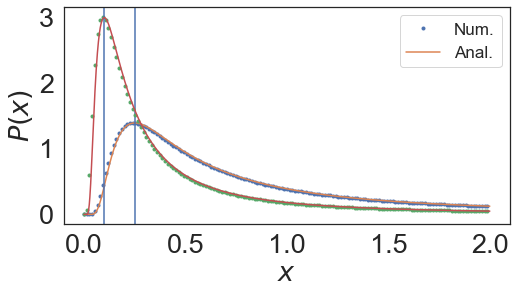

In [ ]:
om, D = 1, 2

delx = 1/0.001 

T, dt = 200000, 0.002
n = int(T / dt)  
t = np.linspace(0., T, n) 
N, X = 150, 2*np.pi*np.random.rand() - np.pi

f, ax = plt.subplots(1, 1, figsize=(8, 4))

xm, xp = 0, 2
del_x = (xp-xm)/N
x = np.arange(xm,xp,del_x)

#Pl = num_fpe_t_(X, om, D1, D2, N, n, f_, g_lin_, dt, xm, del_x)

Pl = np.zeros(N) 
X = 1 
st = 100000
norm = 1/(del_x*(n-st))

D_ = np.sqrt(2*D)
sdt = np.sqrt(dt)

for i in range(n):
    X += dt + (sdt * D_ * X * np.random.randn())

    if i > st:  
        k = int(np.floor((X-xm)/del_x))
        if k < N:
            Pl[k] += norm 

n_ = np.sum(Pl)*del_x
ax.plot(x, np.array(Pl)/n_, '.', label="Num.") 

# These analytical results have been obtained with Mathematica
df=pd.read_csv("/Users/tphillips/multiplicative_noise/c++/DATA/stat_nFPE_J0_om1_Dm2_Dadd_lin.dat",sep=" ",header=None)
df = df.dropna(axis='columns',how='all')
df.columns=['phi','D1','D2','P', 'Pn', 'I', 'PdB']
df1 = df[df['D1'] == D]

ph = np.arange(0, 2, 2/len(df1['Pn']))
y = np.array(df1['Pn'])
n_ = np.sum(y)/delx
ax.plot(ph, y/n_, label="Anal.")

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$P(x)$')
ax.legend(fontsize=17)

s = om/D

ax.axvline(x = s/2, color = 'b', label = 'axvline - full height')

Pl = np.zeros(N) 
om, D = 1, 5

D_ = np.sqrt(2*D)

for i in range(n):
    X += dt + (sdt * D_ * X * np.random.randn())

    if i > st:  
        k = int(np.floor((X-xm)/del_x))
        if k < N and k >= 0:
            Pl[k] += norm 

n_ = np.sum(Pl)*del_x
ax.plot(x, np.array(Pl)/n_, '.', label="Num.") 

s = om/D
ax.axvline(x = s/2, color = 'b', label = 'axvline - full height')

df2 = df[df['D1'] == D]

ph = np.arange(0, 2, 2/len(df2['Pn']))
y = np.array(df2['Pn'])
n_ = np.sum(y)/delx
ax.plot(ph, y/n_, label="Anal.")

### We now consider an example with oscillators and multiplicative noise

Under what genaral conditions does multiplicative noise have synchronising properties? 

$$ \dot{\phi_1}(t) = \xi(t)f(|\phi_1 - \phi_2|) $$

We let the synchronized state be a stable attractor and the state be in that basin of attraction. Coupling noise in such systems has a drift term, which causes the oscillators (or more generally units) to move toward to their stable fixed point. 

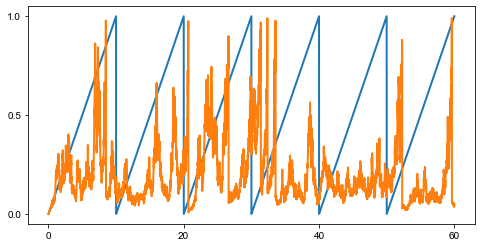

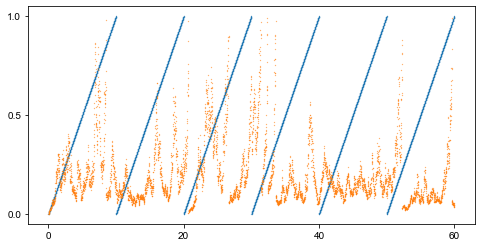

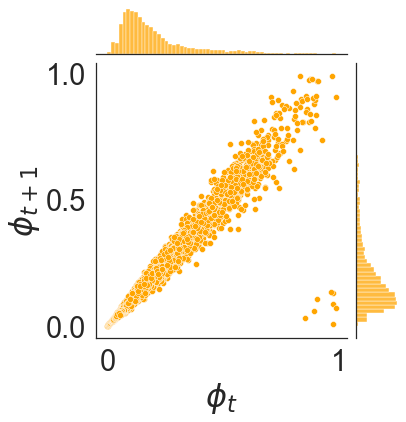

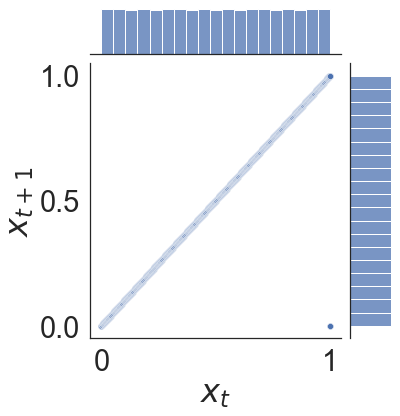

In [ ]:
dt = .01  # Time step.
T = 60.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
phi = np.zeros(n)
x = np.zeros(n)
#sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

om = 0.1 
sig = 1

for i in range(n - 1):
    x[i + 1] = (x[i] + dt * om)%1
    phi[i] = phi[i]%1
    phi[i + 1] = (phi[i] + dt * om + phi[i] * sig * sqrtdt * np.random.randn())%1

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)
ax.plot(t, phi, lw=2)

phi = [s%1 for s in phi]
x = [s%1 for s in x]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, '.', markersize=0.5)
ax.plot(t, phi, '.', markersize=0.5)

sns.set_theme(style="white", rc=params)
sns.mpl.rc("figure", figsize=(6, 6))

x1 = phi[:-1]
x2 = phi[1:]

h = sns.jointplot(x=x1, y=x2, kind="scatter", color='orange') # "scatter", "reg"
_ = h.set_axis_labels(r'$\phi_t$', r'$\phi_{t+1}$', fontsize=32) # , fontsize=24

#h.savefig('xnoise_stoch_om1_t6000.png', bbox_inches='tight', format='png', dpi=120)

x1 = x[:-1]
x2 = x[1:]
h = sns.jointplot(x=x1, y=x2, kind="scatter") # "scatter", "reg"
_ = h.set_axis_labels(r'$x_t$', r'$x_{t+1}$', fontsize=32)

#h.savefig('xnoise_det_om1_t6000.png', bbox_inches='tight', format='png', dpi=120)

'''The blue line represents the deterministic system x. The orange line represents the entire SDE phi'''

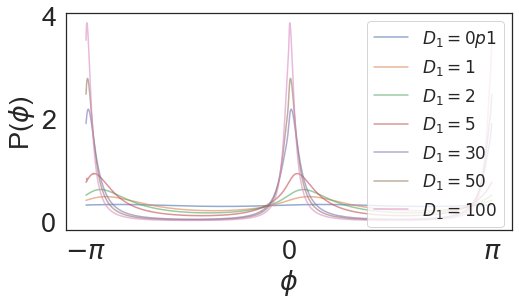

In [ ]:
anal_fpe([0.1, 1, 2, 5, 30, 50, 100], "stat_nFPE_om1_Dm_Dadd0p8")

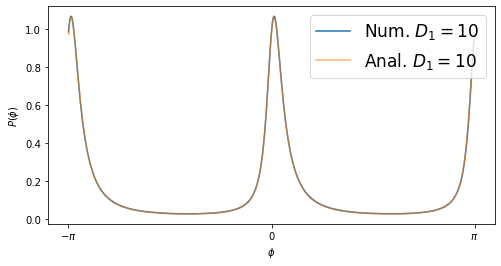

In [ ]:
# Agreement between numerical and analytical results. 

Dadd = 0.02
num_an_fpe_2(1, 10, Dadd, 200000, f_, g, "stat_nFPE_om1_Dm2_Dadd_mpi_a3_5", D1a=10, D2a=Dadd, dt=0.001, Nb=2000)